# `Project`

The `Project` class lets us handle groups of wells. It is really just a list of `Well` objects.

In [1]:
import welly

welly.__version__

'0.4.9'

---

## Make a project

In [2]:
from welly import Project

In [3]:
!ls data/*.LAS

data/24034.LAS      data/P-130_out.LAS  data/P-135_time.LAS
data/P-129_out.LAS  data/P-135_out.LAS


In [4]:
p = Project.from_las("data/P-*_out.LAS")

0it [00:00, ?it/s]/Users/matt/opt/miniconda3/envs/welly/lib/python3.9/site-packages/welly/well.py:193: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)
3it [00:07,  2.49s/it]


In [5]:
len(p)

3

In [6]:
p

Index,UWI,Data,Curves
0,-999.25,22 curves,"CALI, DT, DTS, DPHI_SAN, DPHI_LIM, DPHI_DOL, NPHI_SAN, NPHI_LIM, NPHI_DOL, AMF, AF90, AF10, AF20, AF60, AF30, RXOZ, GR, POTA, THOR, URAN, SP, RHOB"
1,Long = 63* 45'24.460 W,24 curves,"CALI, HCAL, PEF, DT, DTS, DPHI_SAN, DPHI_LIM, DPHI_DOL, NPHI_SAN, NPHI_LIM, NPHI_DOL, RLA5, RLA3, RLA4, RLA1, RLA2, RXOZ, RXO_HRLT, RT_HRLT, RM_HRLT, DRHO, RHOB, GR, SP"
2,100/N14A/11E05,18 curves,"CALI, DT, NPHI_SAN, NPHI_LIM, NPHI_DOL, DPHI_LIM, DPHI_SAN, DPHI_DOL, M2R9, M2R6, M2R3, M2R2, M2R1, GR, SP, PEF, DRHO, RHOB"


Typical, the UWIs are a disaster. Let's ignore this for now.

The `Project` is really just a list-like thing:

In [7]:
for w in p:
    print(w.uwi)

-999.25
Long = 63* 45'24.460  W
100/N14A/11E05


## Plot curves from several wells

In [8]:
import matplotlib.pyplot as plt

In [9]:
alias = {'Gamma': ['GR', 'GRC', 'NGT'], 'Caliper': ['HCAL', 'CALI']}

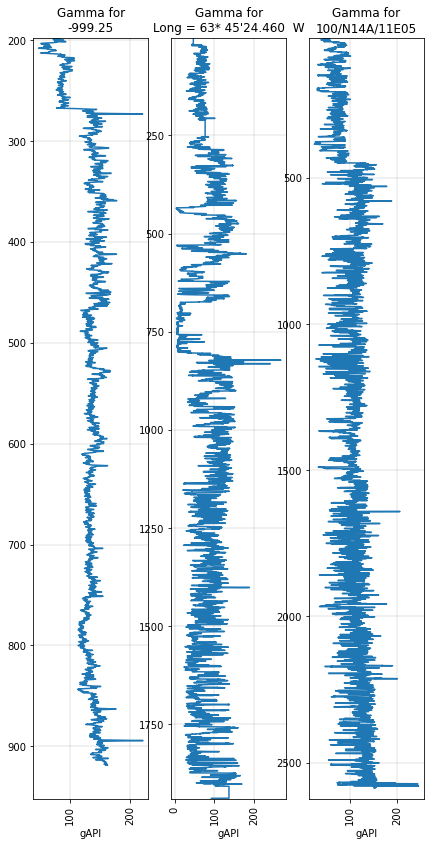

In [10]:
fig, axs = plt.subplots(figsize=(7, 14), ncols=len(p))

for i, (ax, w) in enumerate(zip(axs, p)):
    gr = w.get_curve('Gamma', alias=alias)
    if gr is not None:
        ax = gr.plot(ax=ax)
    ax.set_title("Gamma for\n{}".format(w.uwi))
    
plt.show()

## Export data to pandas DataFrame

This makes a DataFrame using a dual index of UWI and Depth.

In [17]:
keys = ['Caliper', 'Gamma', 'DT']

df = p.df(keys=keys, alias=alias)

In [18]:
df.describe()

,Caliper,Gamma,DT
count,32456.000000,43068.000000,40840.000000
mean,8.240572,99.688700,70.503936
std,1.575287,33.663215,11.057708
min,3.009921,3.894070,40.583134
25%,7.943061,76.377998,63.458676
50%,8.646437,106.260002,68.167877
75%,8.900355,125.804001,74.454033
max,15.579645,267.940430,134.012634


<AxesSubplot:xlabel='Depth'>

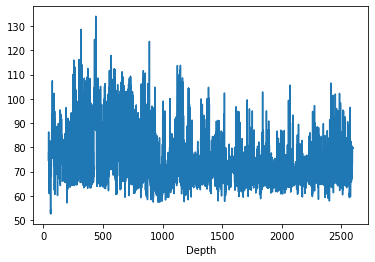

In [19]:
df.loc['100/N14A/11E05'].DT.plot()

In [20]:
x = df.loc['100/N14A/11E05'].index
idx = df.loc['100/N14A/11E05'].loc[(28<x) & (x<30)].index
idx

Float64Index([28.099999999999547,  28.19999999999954, 28.299999999999535,
               28.39999999999953, 28.499999999999524,  28.59999999999952,
              28.699999999999513, 28.799999999999507,   28.8999999999995,
              28.999999999999496,  29.09999999999949, 29.199999999999484,
               29.29999999999948, 29.399999999999473, 29.499999999999467,
               29.59999999999946, 29.699999999999456,  29.79999999999945,
              29.899999999999444,  29.99999999999944],
             dtype='float64', name='Depth')

## Quality

We can make some tests of curve quality.

In [21]:
import welly.quality as q

In [22]:
tests = {
#    'Each': [q.no_gaps],
    'Gamma': [q.no_monotonic, q.no_flat, q.all_positive],
    'DT': [q.all_positive, q.all_between(50, 200)],
}

In [16]:
from IPython.display import HTML

In [17]:
HTML(p.curve_table_html(keys=['CALI', 'Gamma', 'DT', 'SP'], tests=tests, alias=alias))